<a href="https://colab.research.google.com/github/Ryguy-1/cs4774-codeathons/blob/main/zbp6dw_codeathon_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Ryland Birchmeier (zbp6dw)***

# Codeathon 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, You are in charge of building a system to predict housing prices in Ames, Iowa. You need to find the best model given the Iowa Housing dataset, and then see if you can improve its performance further by tuning its hyperparameters.  You must evaluate your model using RMSE with 5-fold cross-validation. You can use Python’s Scikit-Learn API and Google Colab to present your solution and performance to your peers.

* **DOWNLOAD**: Download from Kaggle the Iowa Housing datasetLinks to an external site. in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace.

* **CODE**: Using this provided template, apply the 8 main steps of an ML project on the selected data set. Write code in a Google Colab, download as a .ipynb file and submit via GradeScope before the deadline. For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

* **PRESENT** (Optional): In a later class meeting, give a lightning talk to pitch your solution in 3-5 minutes. Prepare a presentation (in Google Slides) and email me the URL to be considered (3-5 submissions will be selected to present). You will earn 10 bonus points if you are not already one of the top 10 submissions.

**BONUS POINTS:** 10 bonus points will be given (as Extra credits) for those who score among the top-10 leaderboard while following strictly the assignment guidelines. Best of luck to all!

**IMPORTANT**: You must name your submission yourUVAID_codeathon_1.ipynb








## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

In [44]:
"""
1) This is a classic regression task. We are given a CSV with many explanatory features and one, continuous target variable.
This kind of tabular data is very common, and it represents a wide range of problems in many domains.

2) We should expect to be able to reasonably predict the target variable (sale price of a house) from the explanatory features.
This could be extremely useful for a real estate company, for example, to predict the sale price of a house before it is sold.
Beyond this, a model like this could be used to identify undervalued properties, or to identify properties that are likely to sell for a high price.

3) The performance measure to evaluate is how close the predicted sale price is to the actual sale price. In this particular case, we are using
root mean squared error (RMSE) as the performance measure. RMSE is a common performance measure for regression tasks, and it represents the
square root of the average of the squared differences between the predicted and actual values. The lower the RMSE, the better the model.

4) The data is already split into training and test sets, and we are using just the training set to train and evaluate the model with cross-validation.
More data could be collected to improve the model, and it would likely improve the model's performance significantly and help prevent overfitting.

5) There is no particular reason to prefer one model over another at this point. In training, we will try a few different models and see which one
performs best. We will also try different hyperparameters for each model to see if we can improve performance. It is likely that a more complex model
like a Random Forest Regressor will outperform a simpler model like a Linear Regression model, but this can best be determined through experimentation!

6) The amount of effort spent definitely depends on the stakes of the predictions. For this class, we are just trying to learn and practice, so we
don't need to stress about it costing a lot of money if the model is not perfectly accurate. However, if we were working on a real project, we would
want to spend a lot of time making sure our predictions are as repeatably accurate as possible. This could involve collecting more data, trying more
models, and tuning hyperparameters more carefully. It could also involve more careful feature engineering, to make sure the model has the best
possible information to work with.

7) We assume that we will be able to consistently collect these same explanatory features for new houses in the future. If this is not the case,
then the model will not be useful for predicting the sale price of new houses. If we are unable to collect the same features, we will need to
retrain the model with the new features that we can collect. Beyond this, we assume that the relationship between the explanatory features and the
target variable will remain consistent over time. If this is not the case, then the model will not be useful for predicting the sale price of new
houses. If the relationship changes, we will need to retrain the model with the new data that reflects the new relationship. This is a common
problem in machine learning, and it is important to keep the model up-to-date with new data to ensure that it remains as accurate as possible.

"""

"\n1) This is a classic regression task. We are given a CSV with many explanatory features and one, continuous target variable.\nThis kind of tabular data is very common, and it represents a wide range of problems in many domains.\n\n2) We should expect to be able to reasonably predict the target variable (sale price of a house) from the explanatory features.\nThis could be extremely useful for a real estate company, for example, to predict the sale price of a house before it is sold.\nBeyond this, a model like this could be used to identify undervalued properties, or to identify properties that are likely to sell for a high price.\n\n3) The performance measure to evaluate is how close the predicted sale price is to the actual sale price. In this particular case, we are using\nroot mean squared error (RMSE) as the performance measure. RMSE is a common performance measure for regression tasks, and it represents the\nsquare root of the average of the squared differences between the predi

In [45]:
import numpy as np
import pandas as pd
import os

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [46]:
DATA_PATH = "codeathon-1-data/"
TRAIN_CSV_PATH = os.path.join(DATA_PATH, "train.csv")

In [47]:
import pandas as pd

housing_df = pd.read_csv(TRAIN_CSV_PATH)
housing_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [48]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [49]:
# --- (1) How big is your dataset? (in terms of MB) ---
print(f"Approx size of dataset in memory (MB): {housing_df.memory_usage().sum() / 1024**2:.2f}")
print(f"Approx size of dataset on disk (MB): {os.path.getsize(os.path.join(DATA_PATH, 'train.csv')) / 1024**2:.2f}")

Approx size of dataset in memory (MB): 0.90
Approx size of dataset on disk (MB): 0.44


In [50]:
# --- (2) How many entries does it have? ---
print(f"Number of entries: {len(housing_df)}")

Number of entries: 1460


In [51]:
# --- (3) How many features does it have? ---
print(f"Number of features: {len(housing_df.columns)}")
print(f"Number of explanatory features (excluding ID and final prediction): {len(housing_df.columns) - 2}")

Number of features: 81
Number of explanatory features (excluding ID and final prediction): 79


In [52]:
# --- (4) Does it contain any categorical data? ---
categorical_features_cols = housing_df.select_dtypes(include=['object']).columns
print(f"Contains categorical data: {'Yes' if len(categorical_features_cols) > 0 else 'No'}")
print(f"All categorical features ({len(categorical_features_cols)}): {categorical_features_cols}")

Contains categorical data: Yes
All categorical features (43): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [53]:
categorical_features_unique_vals = housing_df[categorical_features_cols].nunique(dropna=True)
print(f"Number of unique values for each categorical feature:\n{categorical_features_unique_vals}")

Number of unique values for each categorical feature:
MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64


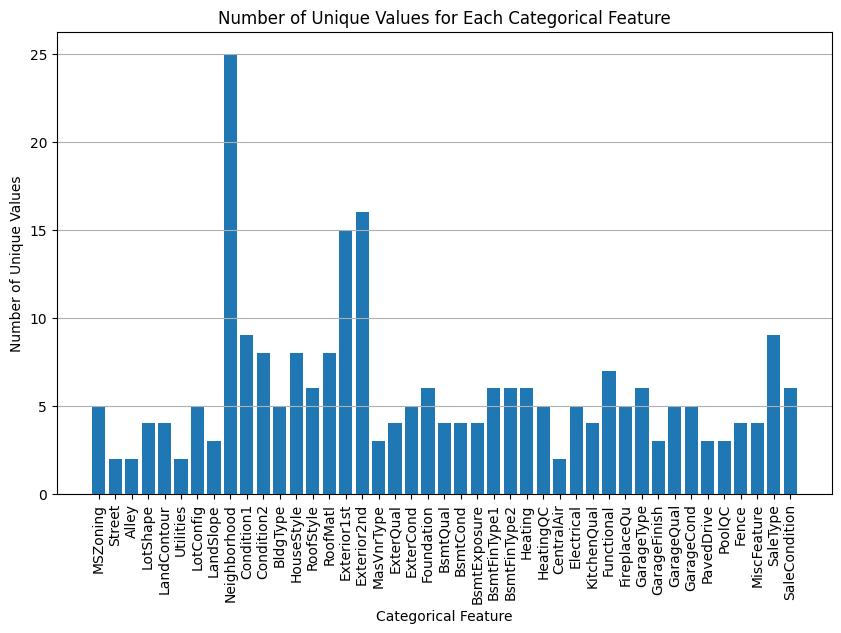

In [54]:
plt.figure(figsize=(10, 6))
plt.bar(categorical_features_unique_vals.index, categorical_features_unique_vals.values)
plt.xlabel("Categorical Feature")
plt.ylabel("Number of Unique Values")
plt.title("Number of Unique Values for Each Categorical Feature")
plt.grid(axis='y')
plt.xticks(rotation=90) 
plt.show()

In [55]:
for col in categorical_features_cols:
    print(f"\n{col}:")
    print(housing_df[col].value_counts())


MSZoning:
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

Street:
Street
Pave    1454
Grvl       6
Name: count, dtype: int64

Alley:
Alley
Grvl    50
Pave    41
Name: count, dtype: int64

LotShape:
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

LandContour:
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

Utilities:
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

LotConfig:
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

LandSlope:
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

Neighborhood:
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR     

In [56]:
# --- (5) Is there any missing values? ---
counts_null_per_feature = housing_df.isnull().sum()
null_feature_counts = counts_null_per_feature[counts_null_per_feature > 0]

print(f"Features with missing values ({len(null_feature_counts)}):")
print(null_feature_counts)

Features with missing values (19):
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


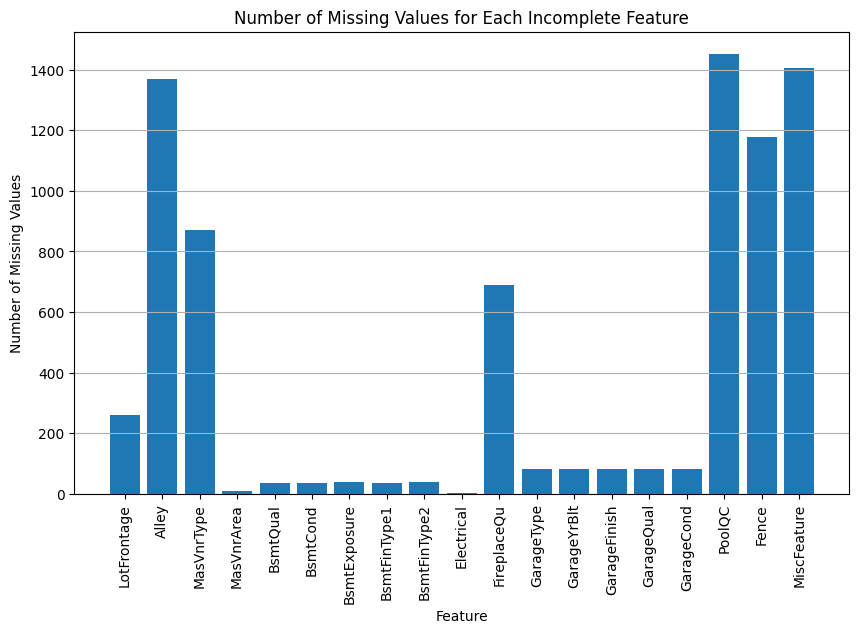

In [57]:
# plot number of missing values per feature
plt.figure(figsize=(10, 6))
plt.bar(null_feature_counts.index, null_feature_counts.values)
plt.xlabel("Feature")
plt.ylabel("Number of Missing Values")
plt.title("Number of Missing Values for Each Incomplete Feature")
plt.grid(axis='y')
plt.xticks(rotation=90)
plt.show()

In [58]:
# --- (6) What are some basic statistics you can learn right away about this dataset? ---
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


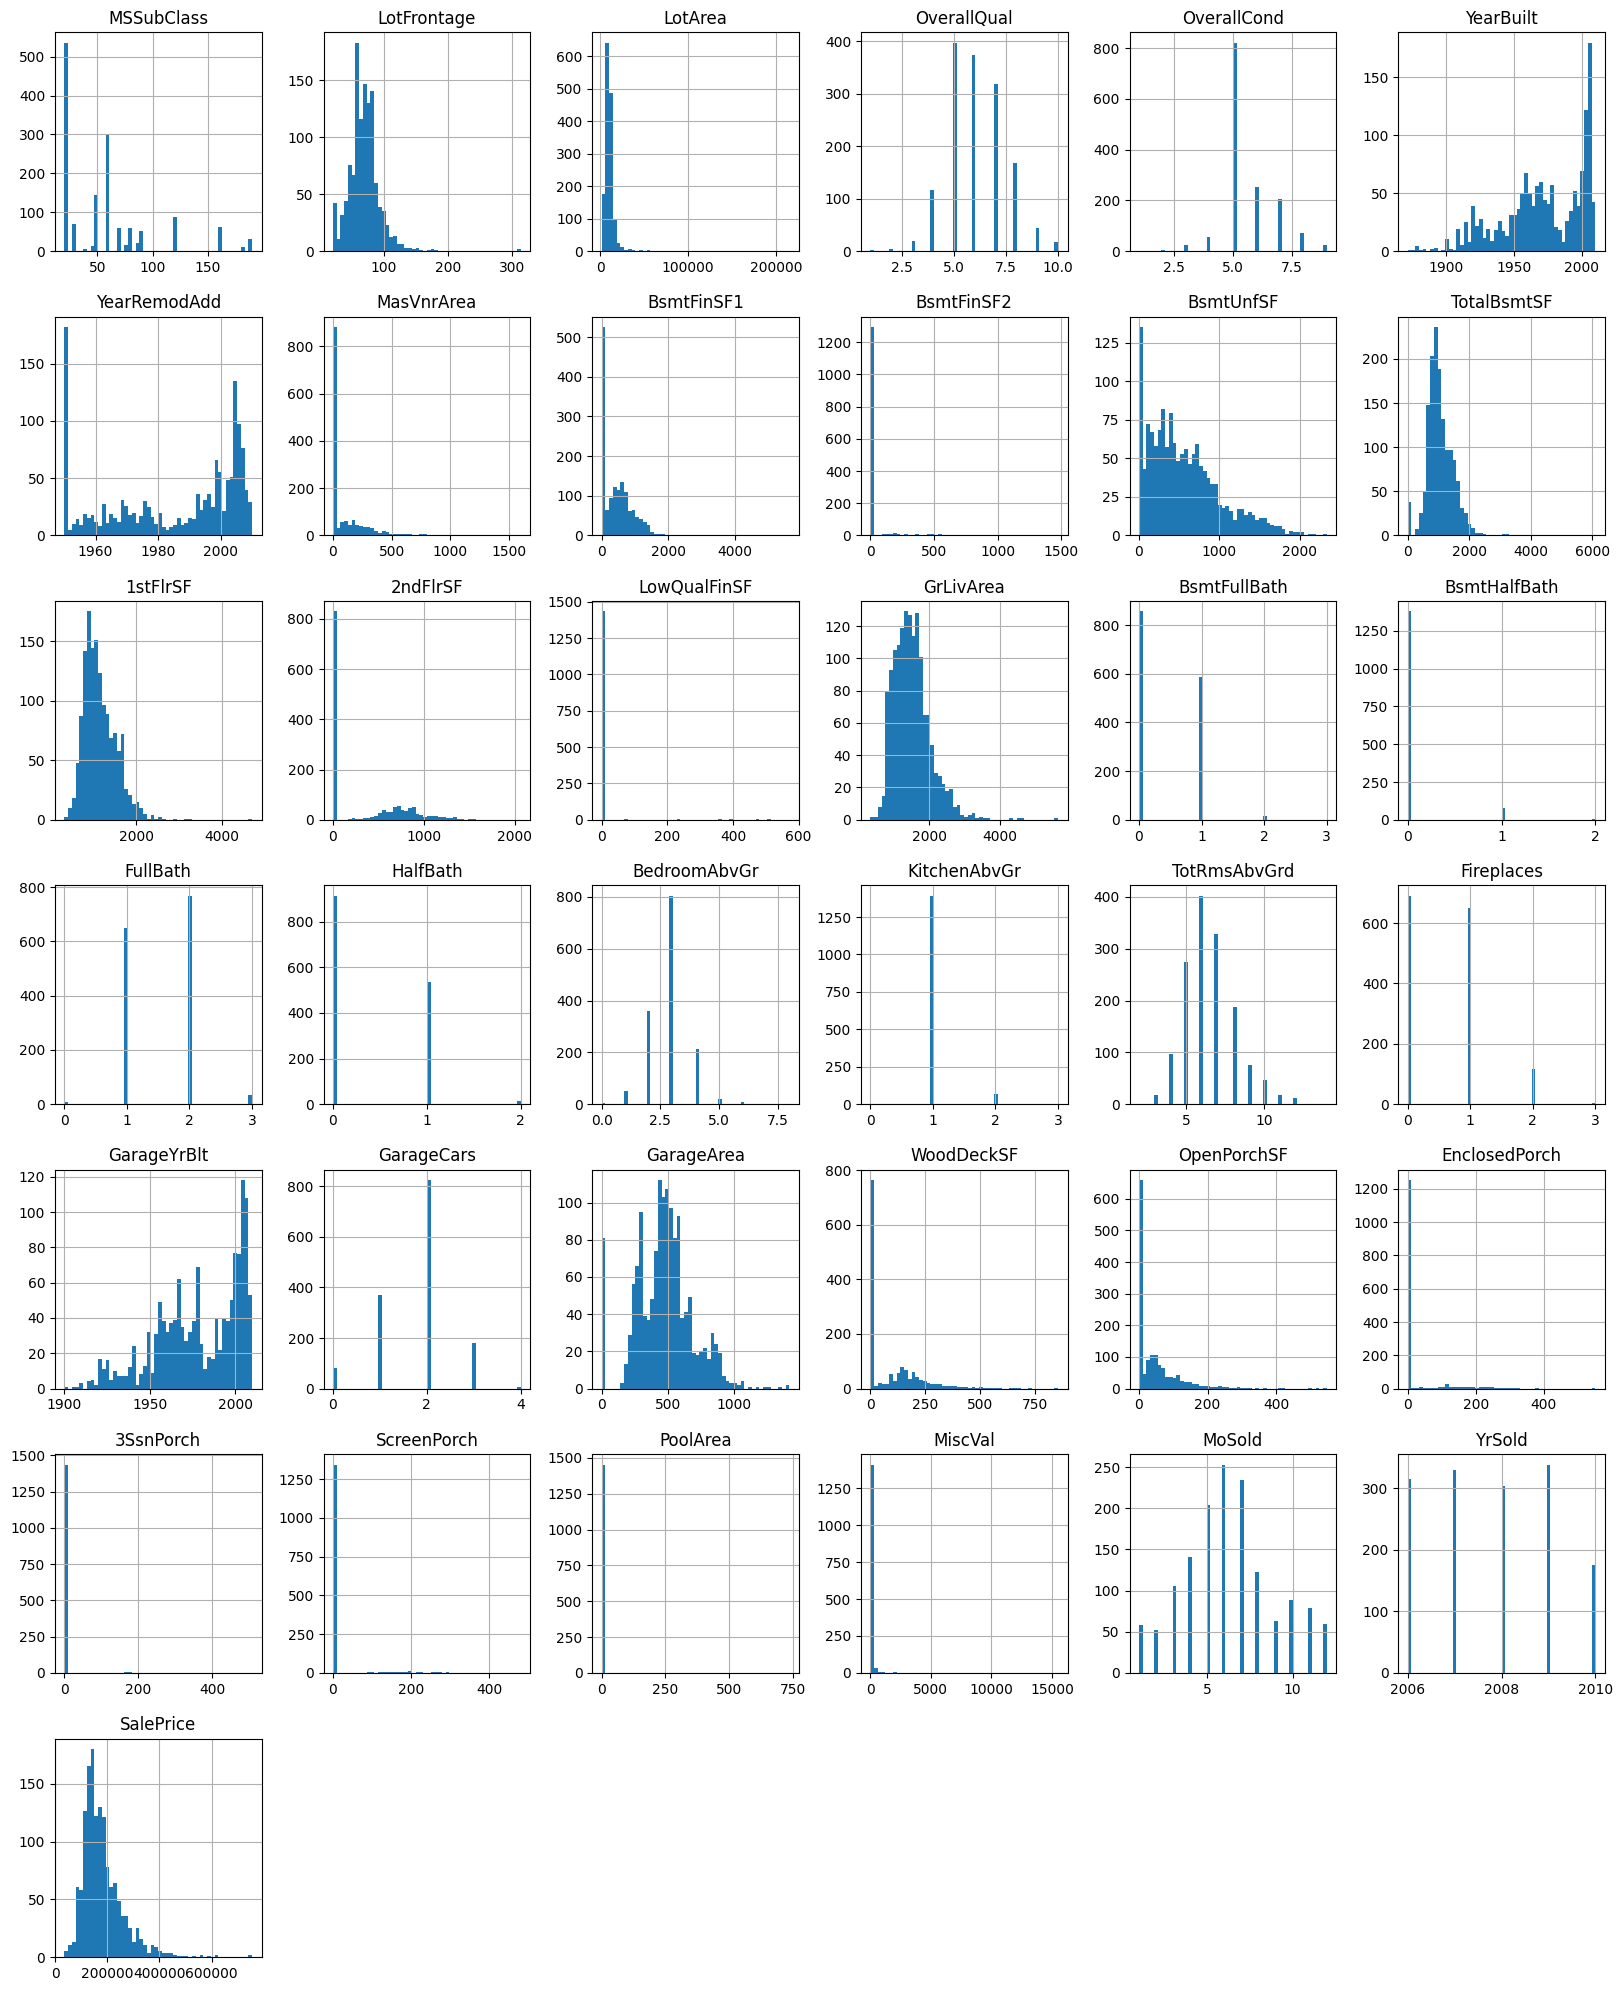

In [59]:
housing_df.drop(columns=["Id"]).hist(bins=50, figsize=(20,25))
plt.show()

## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

In [60]:
corr_matrix = housing_df.drop(columns=["Id"]).corr(numeric_only=True)
print(corr_matrix.shape)

corr_matrix["SalePrice"].sort_values(ascending=False)

(37, 37)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

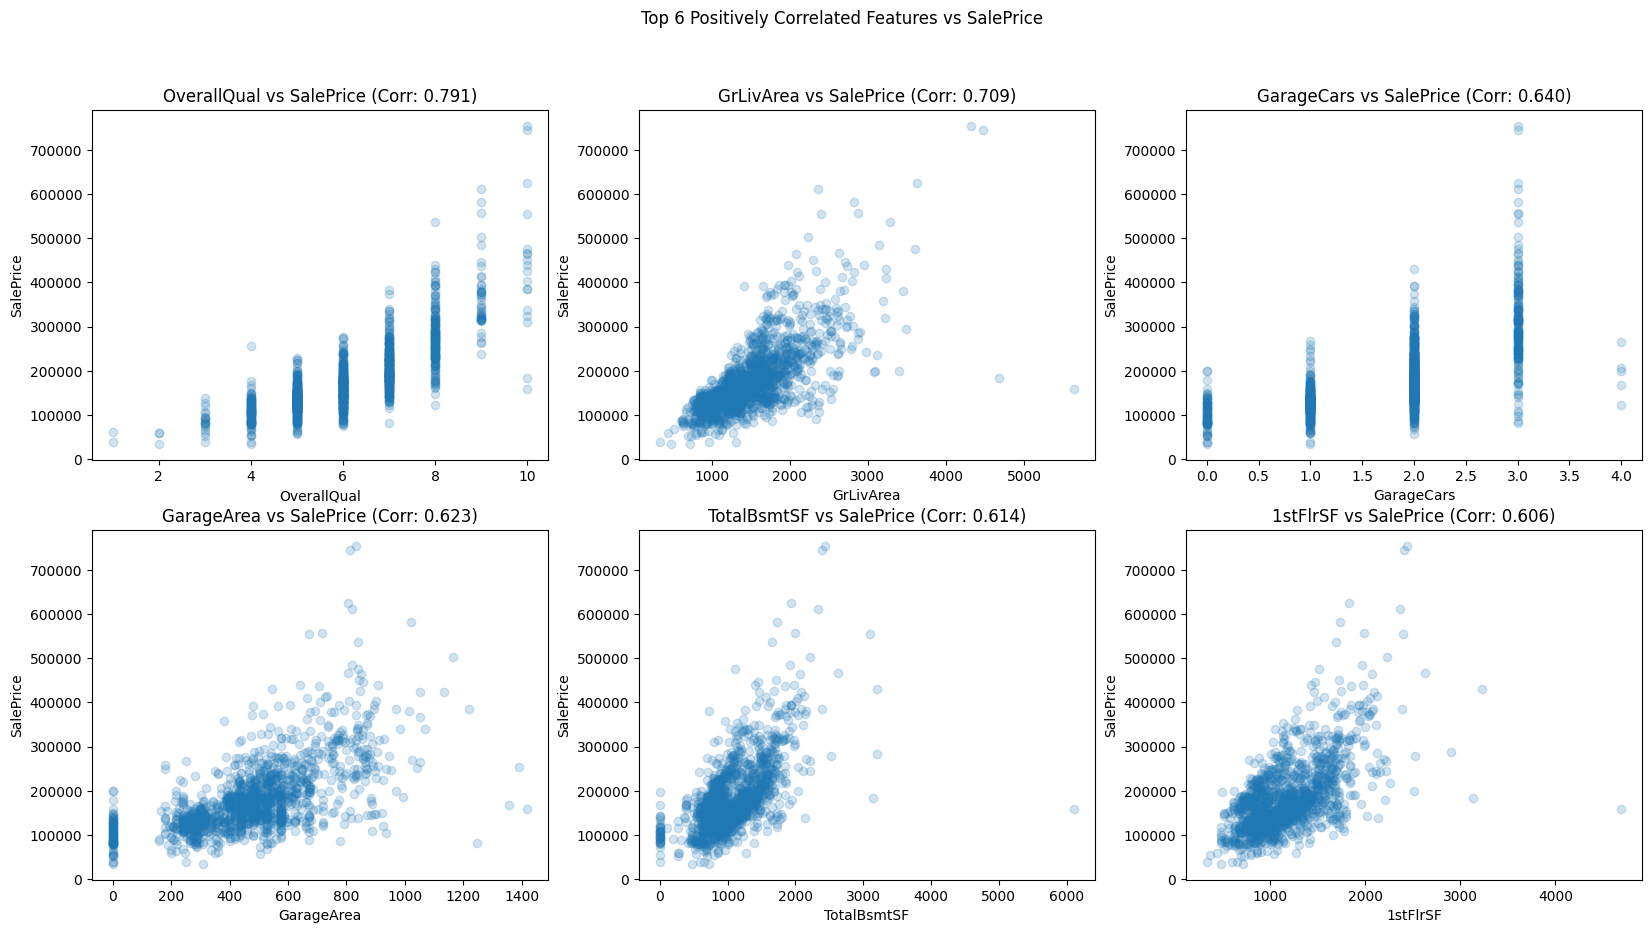

In [61]:
top_pos_corr_features = corr_matrix["SalePrice"].sort_values(ascending=False).index[1:7]

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, feature in enumerate(top_pos_corr_features):
    axs[i // 3, i % 3].scatter(housing_df[feature], housing_df["SalePrice"], alpha=0.2)
    axs[i // 3, i % 3].set_title(f"{feature} vs SalePrice (Corr: {corr_matrix.loc[feature, 'SalePrice']:.3f})")

    axs[i // 3, i % 3].set_xlabel(feature)
    axs[i // 3, i % 3].set_ylabel("SalePrice")

fig.suptitle("Top 6 Positively Correlated Features vs SalePrice")

plt.show()

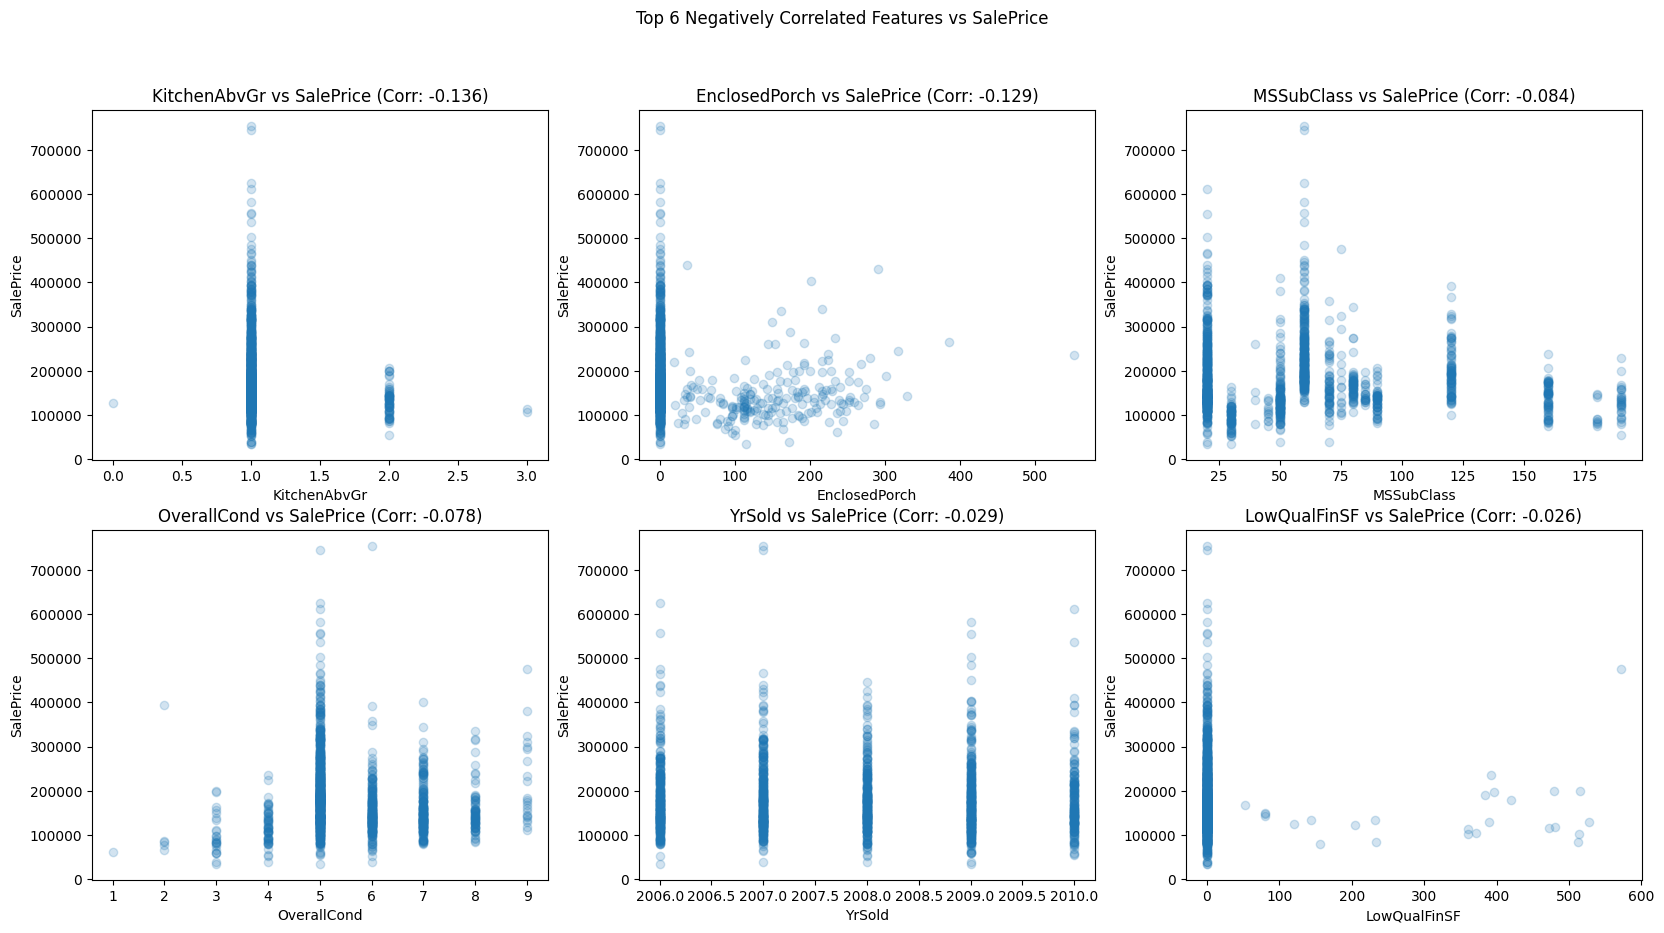

In [62]:
top_neg_corr_features = corr_matrix["SalePrice"].sort_values(ascending=True).index[0:6]

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, feature in enumerate(top_neg_corr_features):
    axs[i // 3, i % 3].scatter(housing_df[feature], housing_df["SalePrice"], alpha=0.2)
    axs[i // 3, i % 3].set_title(f"{feature} vs SalePrice (Corr: {corr_matrix.loc[feature, 'SalePrice']:.3f})")

    axs[i // 3, i % 3].set_xlabel(feature)
    axs[i // 3, i % 3].set_ylabel("SalePrice")

fig.suptitle("Top 6 Negatively Correlated Features vs SalePrice")

plt.show()

In [63]:
# --- Feature Engineering ---
housing_df['TotalSF'] = housing_df['TotalBsmtSF'] + housing_df['1stFlrSF'] + housing_df['2ndFlrSF']
housing_df['TotalBathrooms'] = housing_df['FullBath'] + 0.5*housing_df['HalfBath'] + housing_df['BsmtFullBath'] + 0.5*housing_df['BsmtHalfBath']
housing_df['HouseAge'] = housing_df['YrSold'] - housing_df['YearBuilt']
housing_df['YearsSinceRemodel'] = housing_df['YrSold'] - housing_df['YearRemodAdd']
housing_df['RoomPercentage'] = housing_df['TotRmsAbvGrd'] / housing_df['GrLivArea']
# ---------------------------

In [64]:
corr_matrix = housing_df.drop(columns=["Id"]).corr(numeric_only=True)
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice            1.000000
OverallQual          0.790982
TotalSF              0.782260
GrLivArea            0.708624
GarageCars           0.640409
TotalBathrooms       0.631731
GarageArea           0.623431
TotalBsmtSF          0.613581
1stFlrSF             0.605852
FullBath             0.560664
TotRmsAbvGrd         0.533723
YearBuilt            0.522897
YearRemodAdd         0.507101
GarageYrBlt          0.486362
MasVnrArea           0.477493
Fireplaces           0.466929
BsmtFinSF1           0.386420
LotFrontage          0.351799
WoodDeckSF           0.324413
2ndFlrSF             0.319334
OpenPorchSF          0.315856
HalfBath             0.284108
LotArea              0.263843
BsmtFullBath         0.227122
BsmtUnfSF            0.214479
BedroomAbvGr         0.168213
ScreenPorch          0.111447
PoolArea             0.092404
MoSold               0.046432
3SsnPorch            0.044584
BsmtFinSF2          -0.011378
BsmtHalfBath        -0.016844
MiscVal             -0.021190
LowQualFin

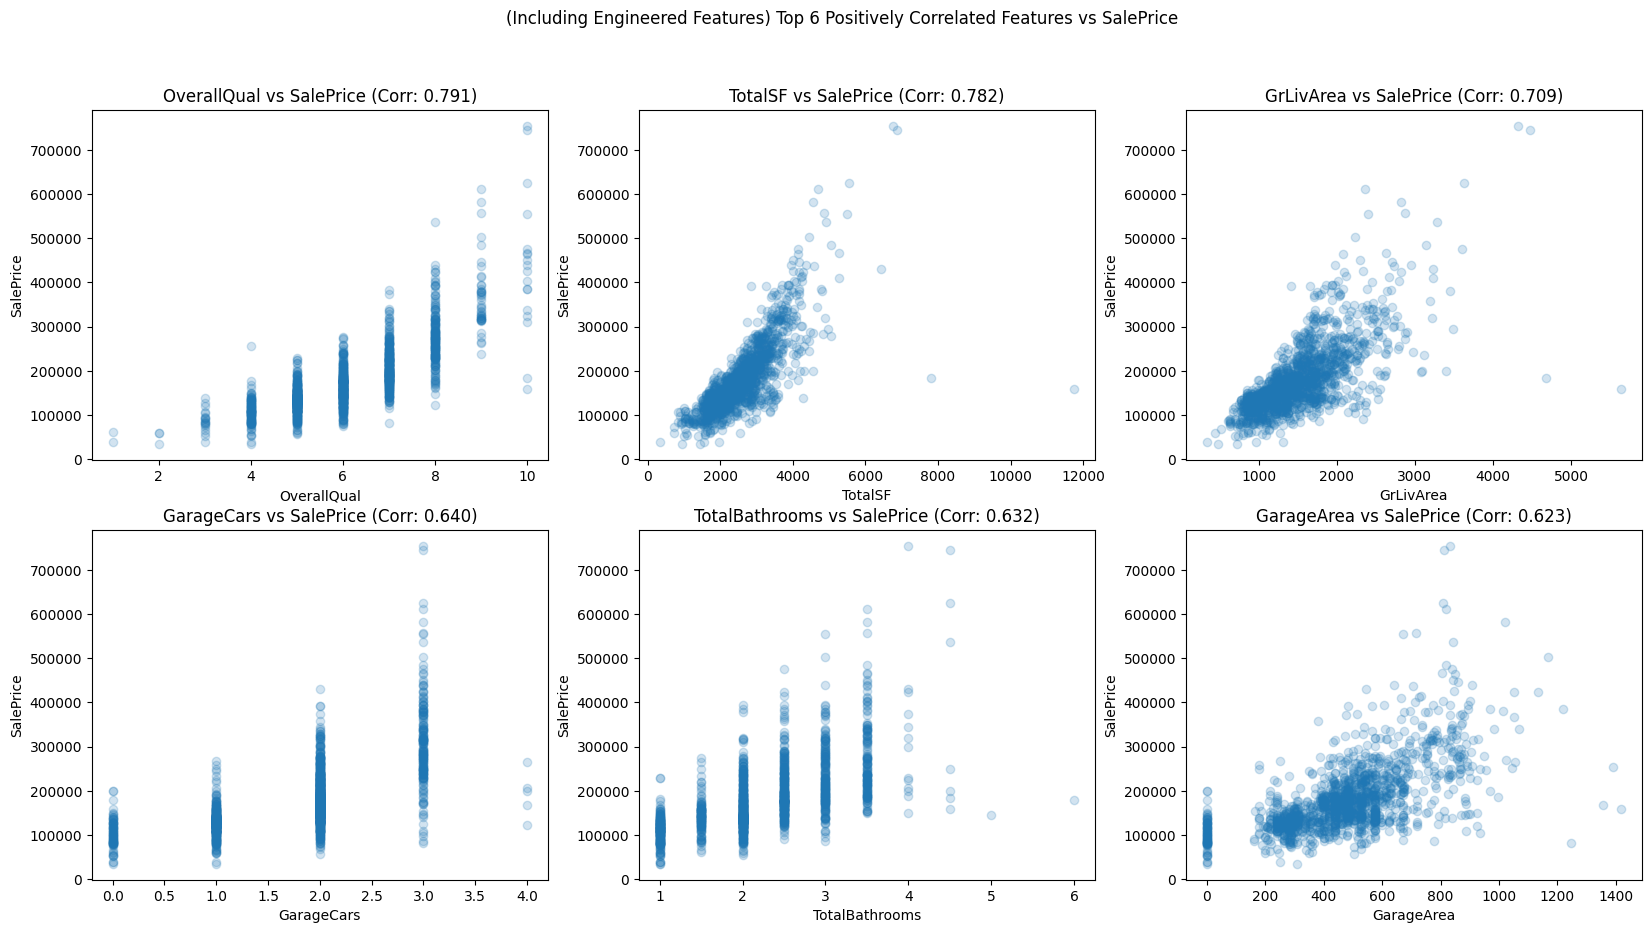

In [65]:
top_pos_corr_features = corr_matrix["SalePrice"].sort_values(ascending=False).index[1:7]

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, feature in enumerate(top_pos_corr_features):
    axs[i // 3, i % 3].scatter(housing_df[feature], housing_df["SalePrice"], alpha=0.2)
    axs[i // 3, i % 3].set_title(f"{feature} vs SalePrice (Corr: {corr_matrix.loc[feature, 'SalePrice']:.3f})")

    axs[i // 3, i % 3].set_xlabel(feature)
    axs[i // 3, i % 3].set_ylabel("SalePrice")

fig.suptitle("(Including Engineered Features) Top 6 Positively Correlated Features vs SalePrice")

plt.show()

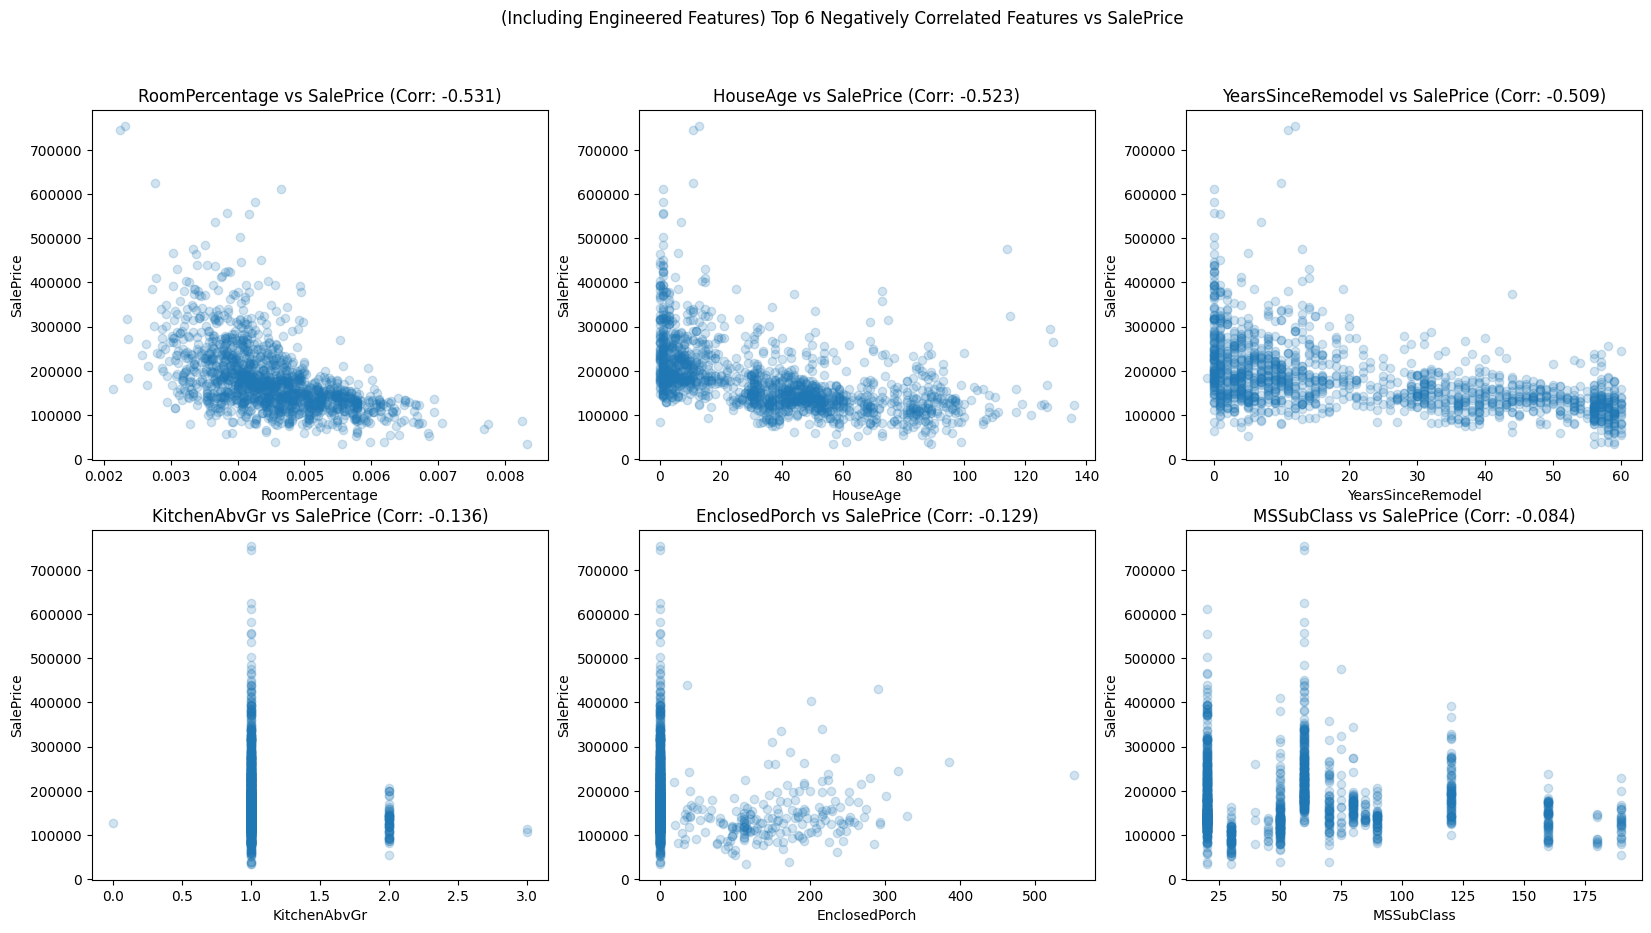

In [66]:
top_neg_corr_features = corr_matrix["SalePrice"].sort_values(ascending=True).index[0:6]

fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, feature in enumerate(top_neg_corr_features):
    axs[i // 3, i % 3].scatter(housing_df[feature], housing_df["SalePrice"], alpha=0.2)
    axs[i // 3, i % 3].set_title(f"{feature} vs SalePrice (Corr: {corr_matrix.loc[feature, 'SalePrice']:.3f})")

    axs[i // 3, i % 3].set_xlabel(feature)
    axs[i // 3, i % 3].set_ylabel("SalePrice")

fig.suptitle("(Including Engineered Features) Top 6 Negatively Correlated Features vs SalePrice")

plt.show()

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class.

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [67]:
from sklearn.model_selection import train_test_split

train_val_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=RANDOM_SEED)
train_set, val_set = train_test_split(train_val_set, test_size=0.2, random_state=RANDOM_SEED)

print(f"Train set shape: {train_set.shape}")
print(f"Validation set shape: {val_set.shape}")
print(f"Test set shape: {test_set.shape}")

train_set_X = train_set.drop(columns=["Id", "SalePrice"])
train_set_Y = train_set["SalePrice"]

val_set_X = val_set.drop(columns=["Id", "SalePrice"])
val_set_Y = val_set["SalePrice"]

test_set_X = test_set.drop(columns=["Id", "SalePrice"])
test_set_Y = test_set["SalePrice"]

print("---")
print(f"Train set X shape: {train_set_X.shape}")
print(f"Train set y shape: {train_set_Y.shape}")
print("---")
print(f"Validation set X shape: {val_set_X.shape}")
print(f"Validation set y shape: {val_set_Y.shape}")
print("---")
print(f"Test set X shape: {test_set_X.shape}")
print(f"Test set y shape: {test_set_Y.shape}")

Train set shape: (934, 86)
Validation set shape: (234, 86)
Test set shape: (292, 86)
---
Train set X shape: (934, 84)
Train set y shape: (934,)
---
Validation set X shape: (234, 84)
Validation set y shape: (234,)
---
Test set X shape: (292, 84)
Test set y shape: (292,)


In [68]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler()),
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore")),
])

all_columns_df = housing_df.drop(columns=["Id", "SalePrice"])
combined_pipeline = ColumnTransformer([
    ("num", num_pipeline, all_columns_df.select_dtypes(exclude=["object"]).columns),
    ("cat", cat_pipeline, all_columns_df.select_dtypes(include=["object"]).columns),
])

fit_combined_pipeline = combined_pipeline.fit(train_set_X)

In [69]:
train_set_X_prepared = fit_combined_pipeline.transform(train_set_X)
val_set_X_prepared = fit_combined_pipeline.transform(val_set_X)
test_set_X_prepared = fit_combined_pipeline.transform(test_set_X)

del train_set_X
del val_set_X
del test_set_X

print(f"Shape of prepared training set: {train_set_X_prepared.shape}")
print(train_set_X_prepared.toarray()[0])

Shape of prepared training set: (934, 303)
[ 1.47985578 -1.1441079  -0.51953584  1.38002416 -0.53365888  1.15470792
  1.07160896  2.23245026  2.40199888 -0.27696094 -1.2825447   1.13830163
  1.15997757 -0.80931419 -0.11973913  0.17993603  1.1000228   3.81678513
  0.79391084 -0.75575005 -1.11126237 -0.20796403 -0.97410841  0.57341381
  1.15477062  0.30157349  0.30745396  0.21403427 -0.70737866 -0.34805532
 -0.12322151  2.5084971  -0.07943957 -0.11902441  2.09254058 -0.61356592
  0.73425568  1.63729033 -1.17946151 -1.11178869 -1.70096978  0.
  0.          0.          0.          1.          0.          1.
  0.          0.          1.          1.          0.          0.
  0.          0.          1.          0.          0.          1.
  0.          0.          0.          0.          0.          1.
  0.          1.          0.          0.          0.          0.
  0.          0.          1.          0.          0.          0.
  0.          0.          0.          0.          0.          0.

## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

In [71]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg_scores = cross_val_score(lin_reg, train_set_X_prepared, train_set_Y, scoring="neg_mean_squared_error", cv=kf)
individual_rmse = np.sqrt(-lin_reg_scores)
overall_rmse = np.sqrt(-lin_reg_scores.mean())

print(f"Individual RMSEs: {individual_rmse}")
print(f"Overall RMSE: {overall_rmse}")

Individual RMSEs: [46193.01872776 81889.02344288 34145.81790377 50994.84658486
 24941.22531654]
Overall RMSE: 51435.55797001335


In [72]:
lin_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [73]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = DecisionTreeRegressor(random_state=RANDOM_SEED)

decision_tree_scores = cross_val_score(decision_tree_reg, train_set_X_prepared, train_set_Y, scoring="neg_mean_squared_error", cv=kf)
individual_rmse = np.sqrt(-decision_tree_scores)
overall_rmse = np.sqrt(-decision_tree_scores.mean())

print(f"Individual RMSEs: {individual_rmse}")
print(f"Overall RMSE: {overall_rmse}")

Individual RMSEs: [48811.96299042 34973.01201553 37109.60630111 53402.34201988
 37067.86103695]
Overall RMSE: 42915.44858277503


In [74]:
decision_tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [75]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = RandomForestRegressor(random_state=RANDOM_SEED)

random_forest_scores = cross_val_score(random_forest_reg, train_set_X_prepared, train_set_Y, scoring="neg_mean_squared_error", cv=kf)
individual_rmse = np.sqrt(-random_forest_scores)
overall_rmse = np.sqrt(-random_forest_scores.mean())

print(f"Individual RMSEs: {individual_rmse}")
print(f"Overall RMSE: {overall_rmse}")

Individual RMSEs: [42842.36666207 28307.40678987 26851.15374106 26535.2257197
 22253.03306794]
Overall RMSE: 30189.659826896946


In [76]:
random_forest_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [77]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=RANDOM_SEED)

gbr_scores = cross_val_score(gbr, train_set_X_prepared, train_set_Y, scoring="neg_mean_squared_error", cv=kf)
individual_rmse = np.sqrt(-gbr_scores)
overall_rmse = np.sqrt(-gbr_scores.mean())

print(f"Individual RMSEs: {individual_rmse}")
print(f"Overall RMSE: {overall_rmse}")

Individual RMSEs: [40530.7855772  29527.5617548  25167.73595088 27436.07206024
 20103.07077365]
Overall RMSE: 29342.487693468498


In [78]:
gbr.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [79]:
from sklearn.metrics import mean_squared_error

# --- Validate fully trained gradient boosting regressor on validation set ---
gradient_boosting_reg = GradientBoostingRegressor(random_state=RANDOM_SEED)
trained_grb = gradient_boosting_reg.fit(train_set_X_prepared, train_set_Y)

val_set_predictions = trained_grb.predict(val_set_X_prepared)
val_set_rmse = np.sqrt(mean_squared_error(val_set_Y, val_set_predictions))

print(f"Validation set RMSE for Gradient Boosting Regressor: {val_set_rmse}")

Validation set RMSE for Gradient Boosting Regressor: 24252.104967027215


## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [5, 30, 50, 100, 200],
}

gbr = GradientBoostingRegressor(random_state=RANDOM_SEED)

grid_search = GridSearchCV(gbr, param_grid, cv=kf, scoring='neg_mean_squared_error', return_train_score=True, verbose=2)
grid_search.fit(train_set_X_prepared, train_set_Y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=   0.0s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.1s
[CV] END min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.

/home/ryland/.virtualenvs/cs4774/lib/python3.10/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [5, 30, 50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [81]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(f"Best RMSE: {np.sqrt(-grid_search.best_score_)}")

{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
GradientBoostingRegressor(min_samples_leaf=2, n_estimators=200, random_state=42)
Best RMSE: 28306.448375895263


In [82]:
# --- Train Best Estimator on Full Training Set ---
final_trained_gbr = grid_search.best_estimator_.fit(train_set_X_prepared, train_set_Y)

In [87]:
# --- Validate Fully Trained Gradient Boosting Regressor on Validation Set for Comparison ---
val_set_predictions = final_trained_gbr.predict(val_set_X_prepared)
val_set_rmse = np.sqrt(mean_squared_error(val_set_Y, val_set_predictions))

print(f"Validation set RMSE for Gradient Boosting Regressor: {val_set_rmse}")
print("Tuned hyperparameters improved RMSE on validation set.")

Validation set RMSE for Gradient Boosting Regressor: 23133.374918579633
Tuned hyperparameters improved RMSE on validation set.


### ** Final Evaluation on Test Set **

In [92]:
from scipy import stats

# --- Test Fully Trained Gradient Boosting Regressor on Test Set ---
final_test_predictions = final_trained_gbr.predict(test_set_X_prepared)
test_set_rmse = np.sqrt(mean_squared_error(test_set_Y, final_test_predictions))
print(f"Final Test set RMSE for Gradient Boosting Regressor: {test_set_rmse}")


confidence = 0.95
squared_errors = (final_test_predictions - test_set_Y) ** 2
confidence_interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

print(f"95% Confidence Interval for Test Set RMSE: {confidence_interval}")

print("On fresh, unseen test data, the model is expected to have an RMSE within the confidence interval above.")

Final Test set RMSE for Gradient Boosting Regressor: 27202.49336745575
95% Confidence Interval for Test Set RMSE: [19891.13518985 32928.62025157]
On fresh, unseen test data, the model is expected to have an RMSE within the confidence interval above.


## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

In [89]:
"""
1) We can pitch this solution as a very useful tool to gain a ballpark, data-driven estimate of the sale price of a house. Beyond this, if we need to
analyze lots of houses quickly, this model could be used to identify undervalued properties, or to identify properties that are likely to sell for a
high price based on historical data. If we are a company like Zillow, this model could be used to provide a quick estimate similar to the "Zestimate"
that they provide on their website.

2) The learnings thus far are many. First and foremost, there are definitely some features that have significantly more predictive power than others.
For example, the overall quality of the house and the total square footage are highly positively correlated with the sale price. Beyond this, there are
some features we can engineer that are highly negatively correlated with the sale price of the house. Some examples of these features include the
age of the house and the years since the last remodel. Both of these discoveries make intuitive sense, and it is good to see that the data supports
our intuition.

3) It would be very helpful to collect more data to improve the model. Currently, we have a relatively small dataset with only 1,460 entries. More data
would likely improve the model's performance significantly. We could also try thinking of new features to engineer that could improve the model's performance,
although we have already engineered a few features that seem to have significantly improved the model's performance. Simply throwing more processing power
while maintaining the same dataset size would likely not improve the predictions hardly at all as we have already tried more powerful methods like 
Random Forests and even XGBoost.
"""

'\n1) We can pitch this solution as a very useful tool to gain a ballpark, data-driven estimate of the sale price of a house. Beyond this, if we need to\nanalyze lots of houses quickly, this model could be used to identify undervalued properties, or to identify properties that are likely to sell for a\nhigh price based on historical data. If we are a company like Zillow, this model could be used to provide a quick estimate similar to the "Zestimate"\nthat they provide on their website.\n\n2) The learnings thus far are many. First and foremost, there are definitely some features that have significantly more predictive power than others.\nFor example, the overall quality of the house and the total square footage are highly positively correlated with the sale price. Beyond this, there are\nsome features we can engineer that are highly negatively correlated with the sale price of the house. Some examples of these features include the\nage of the house and the years since the last remodel. 

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!